# Cat and Dog Image Classification

This notebook implements a Convolutional Neural Network (CNN) to classify images of cats and dogs.

In [1]:
print("Hello World!")

Hello World!


In [2]:
# Instalacja wymaganych pakietów
%pip install tensorflow numpy pandas matplotlib pillow gradio

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import bibliotek
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gradio as gr

# Ustawienie ziarna losowości
tf.random.set_seed(42)
np.random.seed(42)

# Stałe
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 15

# Ścieżki do danych
TRAIN_DIR = 'data/train'
TEST_DIR = 'data/test'

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Przygotowanie danych i augmentacja
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,  # Zwiększony zakres zoomu
    horizontal_flip=True,
    vertical_flip=False,  # Dodane odbicie pionowe
    brightness_range=[0.7, 1.3],  # Dodana zmiana jasności
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
# Tworzenie modelu CNN
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Zwiększamy liczbę epok
EPOCHS = 25

model.summary()

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,078,401 (27.00 MB)

 Trainable params: 7,075,713 (26.99 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [6]:
# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

/Users/fbrzeski/Downloads/projekt_cat_dog_final/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.5679 - loss: 0.8577 - val_accuracy: 0.4998 - val_loss: 2.2418
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.6167 - loss: 0.7386 - val_accuracy: 0.5556 - val_loss: 0.8103
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 814s 3s/step - accuracy: 0.6326 - loss: 0.6945 - val_accuracy: 0.7004 - val_loss: 0.5629
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 4309s 17s/step - accuracy: 0.6492 - loss: 0.6800 - val_accuracy: 0.7355 - val_loss: 0.5325
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.6643 - loss: 0.6583 - val_accuracy: 0.7232 - val_loss: 0.5293
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.6623 - loss: 0.6487 - val_accuracy: 0.7484 - val_loss: 0.5137
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 646s 3s/step - accuracy: 0.6809 - loss: 0.6258 - val_accuracy: 0.7721 - val_loss: 0.4755
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 1155s 5s/step - accuracy: 0.6940 - loss: 0.6014 - val_a

In [11]:
# Tworzenie katalogu na modele (jeśli nie istnieje)
import os
from datetime import datetime

models_dir = 'saved_models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Dodanie daty do nazwy
current_time = datetime.now().strftime("%Y%m%d_%H%M")
model_path = os.path.join(models_dir, f'model_cats_dogs_full_{current_time}.keras')
weights_path = os.path.join(models_dir, f'model_cats_dogs_{current_time}.weights.h5')  # zmienione rozszerzenie

# Zapisywanie modelu
model.save(model_path)
model.save_weights(weights_path)

print(f"Model został zapisany w katalogu: {models_dir}")
print(f"Pełny model: {model_path}")
print(f"Wagi modelu: {weights_path}")

Model został zapisany w katalogu: saved_models
Pełny model: saved_models/model_cats_dogs_full_20250531_1704.keras
Wagi modelu: saved_models/model_cats_dogs_20250531_1704.weights.h5


In [ ]:
# Zapisywanie modelu
# 1. Pełny model w formacie SavedModel
model.save('model_cats_dogs_full')

# 2. Tylko wagi modelu w formacie H5
model.save_weights('model_cats_dogs_weights.h5')

print("Model został zapisany!")

In [ ]:
# Wczytywanie zapisanego modelu
import tensorflow as tf

# Ścieżka do twojego zapisanego modelu (zmień nazwę na tę, którą wyświetlił poprzedni kod)
model_path = 'saved_models/model_cats_dogs_full_20240315_1423.keras'  # zmień datę na twoją

# Wczytywanie pełnego modelu
loaded_model = tf.keras.models.load_model(model_path)
print("Model został wczytany!")

# Możesz teraz używać loaded_model zamiast model
# np. loaded_model.predict(...)

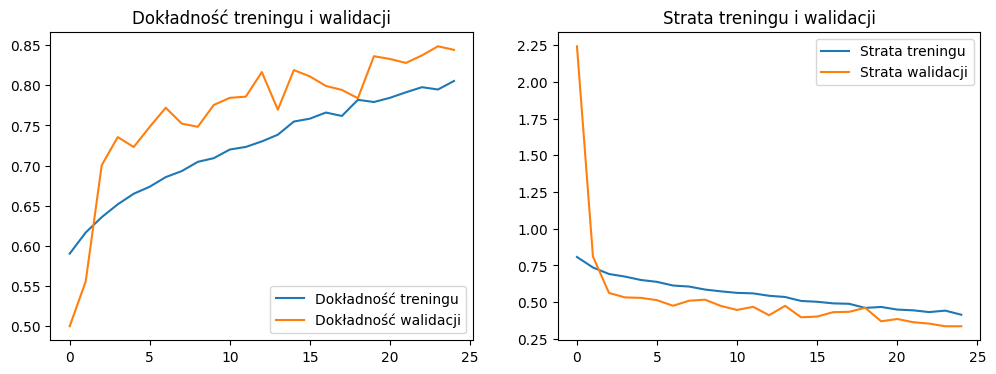

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/var/folders/s5/d2czd6ls5_14ql58_vg0jnrh0000gn/T/ipykernel_89307/2986648854.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(prediction[0])


In [ ]:
# Wizualizacja wyników treningu
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Dokładność treningu')
plt.plot(epochs_range, val_acc, label='Dokładność walidacji')
plt.legend()
plt.title('Dokładność treningu i walidacji')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Strata treningu')
plt.plot(epochs_range, val_loss, label='Strata walidacji')
plt.legend()
plt.title('Strata treningu i walidacji')
plt.show()

In [8]:
# Funkcja do predykcji
def predict_image(img):
    # Przygotowanie obrazu
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.expand_dims(img, 0)  # Dodanie wymiaru batch
    img = img / 255.0  # Normalizacja
    
    # Predykcja
    prediction = model.predict(img)
    score = float(prediction[0])
    
    # Zwracamy wynik jako string
    if score > 0.5:
        return f"Pies (pewność: {score:.2%})"
    else:
        return f"Kot (pewność: {(1-score):.2%})"

# Tworzenie interfejsu Gradio
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(),
    outputs=gr.Text(),
    title="Klasyfikator Kotów i Psów",
    description="Wgraj zdjęcie kota lub psa, aby sprawdzić jak model je sklasyfikuje."
)

interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://f59b00209b68703149.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
